In [1]:
from random import random, choice
from core import Agent
from gym import Env
import gym
from gridworld import WindyGridWorld, SimpleGridWorld
from utils import str_key, set_dict, get_dict
from utils import epsilon_greedy_pi, epsilon_greedy_policy
from utils import greedy_policy, learning_curve

In [2]:
class SarsaLambdaAgent(Agent):
    def __init__(self, env:Env, capacity:int = 20000):
        super(SarsaLambdaAgent, self).__init__(env, capacity)
        self.Q = {}

    def policy(self, A, s, Q, epsilon):
        return epsilon_greedy_policy(A, s, Q, epsilon)
    
    def learning_method(self, lambda_ = 0.9, gamma = 0.9, alpha = 0.1, epsilon = 1e-5, display = False):
        self.state = self.env.reset()
        s0 = self.state
        if display:
            self.env.render()
        a0 = self.perform_policy(s0, self.Q, epsilon)
        # print(self.action_t.name)
        time_in_episode, total_reward = 0,0
        is_done = False
        E = {}
        while not is_done:
            # add code here
            s1, r1, is_done, info, total_reward = self.act(a0)
            if display:
                self.env.render()
            a1 = self.perform_policy(s1, self.Q, epsilon)
            
            q = get_dict(self.Q, s0, a0)
            q_prime = get_dict(self.Q, s1, a1)
            delta = r1 + gamma * q_prime - q
            
            e = get_dict(E, s0, a0)
            e += 1
            set_dict(E, e, s0, a0)

            for s in self.S:
                for a in self.A:
                    e_value = get_dict(E, s, a)
                    old_q = get_dict(self.Q, s, a)
                    new_q = old_q + alpha * delta * e_value
                    new_e = gamma * lambda_ * e_value
                    set_dict(self.Q, new_q, s, a)
                    set_dict(E, new_e, s, a)
                    
            s0, a0 = s1, a1
            time_in_episode += 1
        if display:
            print(self.experience.last_episode)
        return time_in_episode, total_reward

In [3]:
env = WindyGridWorld()
agent = SarsaLambdaAgent(env, capacity = 100000)

statistics = agent.learning(lambda_ = 0.8, gamma = 1.0, epsilon = 0.2,\
    decaying_epsilon = True, alpha = 0.5, max_episode_num = 800, display = False)


100%|██████████| 800/800 [00:44<00:00, 18.13it/s]


No handles with labels found to put in legend.


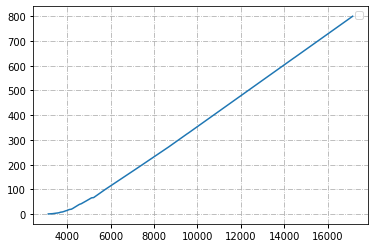

In [4]:
learning_curve(statistics,0,2)

In [1]:
agent.learning_method(lambda_ = 0.9, epsilon = 0.0001, display = True)

NameError: name 'agent' is not defined

In [6]:
agent.learning(max_episode_num = 2, display = True)

 50%|█████     | 1/2 [00:00<00:00,  3.74it/s]

episode 801    16 steps,total reward:-15.00  


100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

episode 802    81 steps,total reward:-80.00  


([16, 97], [-15, -80], [1, 2])

In [7]:
env.close()